In [4]:
import pyspark
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import NaiveBayes
from pyspark.mllib.linalg import Vectors
import matplotlib.pyplot as plt
from random import shuffle

sc = pyspark.SparkContext('local[*]')

In [16]:
"""
For a given testing set, the model is tested and then, the accuracy and some other statistics are shown
"""

def TryModel(testing_set):
    
    testing_set_rdd = sc.parallelize(testing_set)
    
    home_win_model_predicts_home = 0
    home_win_model_predicts_draw = 0
    home_win_model_predicts_away = 0
    draw_model_predicts_home = 0
    draw_model_predicts_draw = 0
    draw_model_predicts_away = 0
    away_win_model_predicts_home = 0
    away_win_model_predicts_draw = 0
    away_win_model_predicts_away = 0
    for bet in testing_set:
        tobj = Vectors.dense(bet[1])
        if bet[0] == 1:
            if modelbayes1.predict(tobj) == 1:
                home_win_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                home_win_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                home_win_model_predicts_away += 1
        elif bet[0] == 0:
            if modelbayes1.predict(tobj) == 1:
                draw_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                draw_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                draw_model_predicts_away += 1
        elif bet[0] == -1:
            if modelbayes1.predict(tobj) == 1:
                away_win_model_predicts_home += 1
            elif modelbayes1.predict(tobj) == 0:
                away_win_model_predicts_draw += 1
            elif modelbayes1.predict(tobj) == -1:
                away_win_model_predicts_away += 1
        #print("Most probable value for ", tobj, " : ", modelbayes1.predict(tobj), "-> REAL RESULT: ", bet[0])

    print("Detailed Statistics")
    labels = ['home_win_model_predicts_home', 'home_win_model_predicts_draw', 'home_win_model_predicts_away',
    'draw_model_predicts_home', 'draw_model_predicts_draw', 'draw_model_predicts_away',
    'away_win_model_predicts_home', 'away_win_model_predicts_draw', 'away_win_model_predicts_away']
    sizes = [home_win_model_predicts_home, home_win_model_predicts_draw, home_win_model_predicts_away, 
            draw_model_predicts_home, draw_model_predicts_draw, draw_model_predicts_away,
            away_win_model_predicts_home, away_win_model_predicts_draw, away_win_model_predicts_away]
    explode = (0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()
        
    print("Total hits (" 
          + str(home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) 
          + "/" + str(len(testing_set)) + ")")
    
    labels = 'Hits', 'No-Hits'
    sizes = [(home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) * 100 / len(testing_set), 
             100 - (home_win_model_predicts_home + draw_model_predicts_draw + away_win_model_predicts_away) * 100 / len(testing_set)]
    explode = (0.1, 0.0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()
    
    print("Home win hits (" 
          + str(home_win_model_predicts_home) 
          + "/" + str(testing_set_rdd.filter(lambda element : element[0] == 1).count()) + ")")
    
    sizes = [(home_win_model_predicts_home) * 100 / testing_set_rdd.filter(lambda element : element[0] == 1).count(), 
             100 - (home_win_model_predicts_home) * 100 / testing_set_rdd.filter(lambda element : element[0] == 1).count()]
    explode = (0.1, 0.0)


    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

    print("Draw hits (" 
          + str(draw_model_predicts_draw) 
          + "/" + str(testing_set_rdd.filter(lambda element : element[0] == 0).count()) + ")")
    
    sizes = [(draw_model_predicts_draw) * 100 / testing_set_rdd.filter(lambda element : element[0] == 0).count(), 
             100 - (draw_model_predicts_draw) * 100 / testing_set_rdd.filter(lambda element : element[0] == 0).count()]
    explode = (0.1, 0.0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

    print("Away win hits (" 
          + str(away_win_model_predicts_away) 
          + "/" + str(testing_set_rdd.filter(lambda element : element[0] == -1).count()) + ")")
    
    sizes = [(away_win_model_predicts_away) * 100 / testing_set_rdd.filter(lambda element : element[0] == -1).count(), 
             100 - (away_win_model_predicts_away) * 100 / testing_set_rdd.filter(lambda element : element[0] == -1).count()]
    explode = (0.1, 0.0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

In [6]:
def remove_duplicates(lst):
    seen = set()
    seen_add = seen.add
    return [x for x in lst if not (x in seen or seen_add(x))]

def result_to_numeric(result):
    if(result == 'H'):
        return 1
    elif(result == 'D'):
        return 0
    elif(result == 'A'):
        return -1

def group(lst):
    grouped_bets = []
    iteration = 0
    for index in range(len(lst)/3):
        if lst[iteration*3] != "" and lst[iteration*3 + 1] != "" and lst[iteration*3 + 2] != "":
            try:
                grouped_bets.append(float(lst[iteration*3]))
                grouped_bets.append(float(lst[iteration*3 + 1]))
                grouped_bets.append(float(lst[iteration*3 + 2]))
            except ValueError:
                raise ValueError("Could not convert to float some of these: ", lst[iteration*3] + "_" + lst[iteration*3 + 1] + "_" + lst[iteration*3 +2])
        iteration += 1
    return grouped_bets

Bet Houses: [u'B365', u'BS', u'BW', u'GB', u'IW', u'LB', u'SB', u'SJ', u'VC', u'WH']
[LabeledPoint(1.0, [1.67,3.4,5.75,1.62,3.4,5.4,1.67,3.25,5.75,1.65,3.3,5.5,1.6,3.4,5.2,1.57,3.25,5.5,1.6,3.3,5.5,1.62,3.25,6.5,1.67,3.25,5.4,1.53,3.4,6.5]), LabeledPoint(0.0, [2.38,3.25,3.0,2.25,3.25,3.0,2.2,3.2,2.9,2.3,3.25,2.8,2.3,3.1,2.6,2.2,3.25,2.75,2.3,3.4,2.7,2.38,3.2,2.75,2.3,3.25,2.7,2.25,3.2,2.75]), LabeledPoint(-1.0, [3.6,3.0,2.2,3.1,2.9,2.25,3.9,3.0,2.05,3.5,3.0,2.1,3.4,3.2,2.0,3.2,3.0,2.1,3.4,3.1,2.25,3.1,3.0,2.25,3.6,3.12,2.25,3.6,3.1,2.1]), LabeledPoint(1.0, [1.91,3.4,4.0,1.91,3.4,4.0,1.95,3.15,3.95,2.0,3.2,3.75,1.9,3.3,3.7,1.91,3.2,3.5,1.9,3.2,3.8,1.95,3.3,4.0,2.0,3.4,4.0,1.91,3.3,4.2]), LabeledPoint(1.0, [1.25,5.5,12.0,1.25,5.5,11.0,1.3,5.25,9.0,1.25,5.25,12.0,1.3,4.8,8.5,1.29,5.0,11.0,1.25,5.25,12.0,1.3,5.25,11.0,1.29,6.0,12.0,1.29,5.0,11.0])]
('\n Model parameters: \n', '  labels: ', array([-1.,  0.,  1.]), '\n  prior probabilities (log of): ', array([-1.28144542, -1.31958941, -0.787

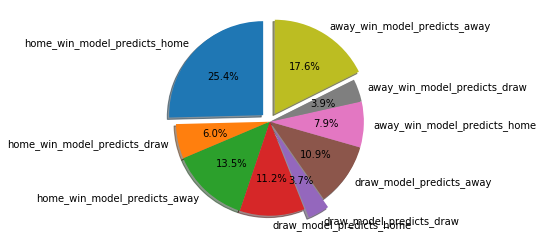

Total hits (1604/3433)


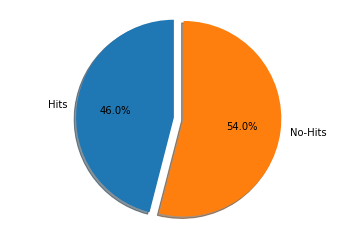

Home win hits (872/1539)


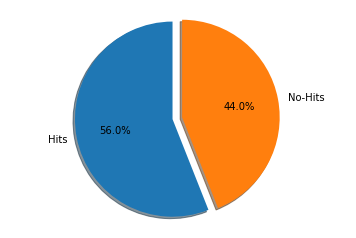

Draw hits (127/884)


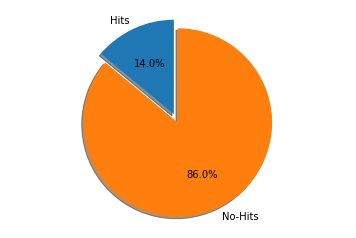

Away win hits (605/1010)


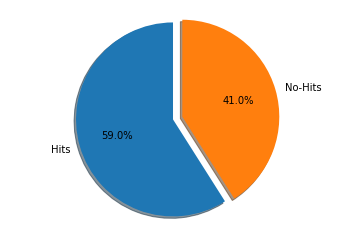

In [17]:
"""
The model is created, trained and tested for the dataset main_competitions.csv. 
The dataset is devided in 90% for training and 10% for testing
"""

bets_csv_file = sc.textFile("../Data/Interim/main_competitions.csv")

bet_houses = remove_duplicates(bets_csv_file.map(lambda line: line.split(","))\
        .map(lambda line : map(lambda bet_house : bet_house[:-1], line[8:38])).take(1)[0])

print("Bet Houses: " + str(bet_houses))

bets = bets_csv_file.map(lambda line: line.split(","))\
        .filter(lambda line : line[0] != "Country")\
        .map(lambda line: (result_to_numeric(line[7]), group(line[8:38])))\
        .filter(lambda element : len(element[1]) == len(bet_houses) * 3)

bets_list = bets.collect()
shuffle(bets_list)

training_set_length = int(len(bets_list)*0.9)

training_set = bets_list[:training_set_length]
testing_set = bets_list[training_set_length:]

bayes1RDD = sc.parallelize(training_set).map( lambda element :  LabeledPoint(element[0], Vectors.dense( element[1] ) ) )

print (bayes1RDD.take(5))

modelbayes1 = NaiveBayes.train(bayes1RDD)
print ( "\n Model parameters: \n", "  labels: ", modelbayes1.labels, \
"\n  prior probabilities (log of): ", modelbayes1.pi,   \
"\n  factor probabilities (log of): ", modelbayes1.theta, "\n")

# Make prediction and test accuracy on the training set.
predictionAndLabel = bayes1RDD.map(lambda p: (modelbayes1.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda pandl: pandl[0] == pandl[1]).count() / bayes1RDD.count()
print ( "Accuracy of the model obtained on training data : ", accuracy, "\n")


TryModel(testing_set)

Bet Houses: [u'WH', u'SB', u'IW', u'GB']
[LabeledPoint(1.0, [2.45,3.5,2.62,2.4,3.4,2.7]), LabeledPoint(1.0, [1.33,5.5,8.0,1.37,5.0,8.0]), LabeledPoint(0.0, [2.15,3.25,3.6,2.1,3.2,3.8]), LabeledPoint(1.0, [2.1,3.5,3.3,2.0,3.3,3.45]), LabeledPoint(1.0, [1.91,3.7,3.75,1.85,3.35,3.7])]
('\n Model parameters: \n', '  labels: ', array([-1.,  0.,  1.]), '\n  prior probabilities (log of): ', array([-1.22691614, -1.3163612 , -0.82394969]), '\n  factor probabilities (log of): ', array([[-1.81026211, -1.67243544, -1.85843425, -1.83950746, -1.71350017,
        -1.87370609],
       [-2.05155597, -1.68068797, -1.65493886, -2.06951289, -1.71804666,
        -1.66891099],
       [-2.32327209, -1.70868888, -1.46217202, -2.33817387, -1.75432548,
        -1.51556355]]), '\n')
('Accuracy of the model obtained on training data : ', 0.5043942247332078, '\n')
Detailed Statistics


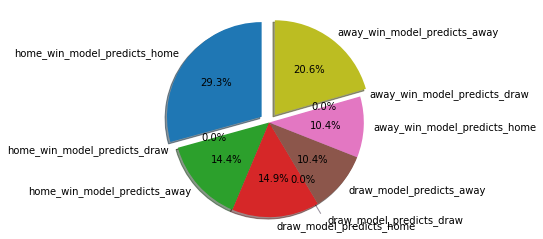

Total hits (177/355)


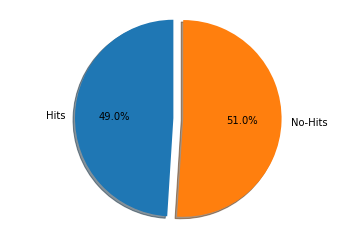

Home win hits (104/155)


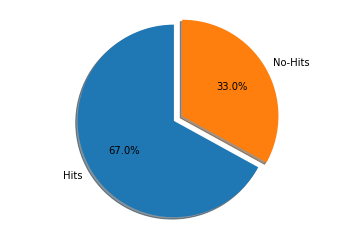

Draw hits (0/90)


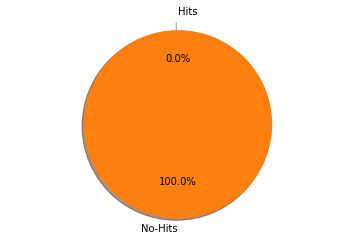

Away win hits (73/110)


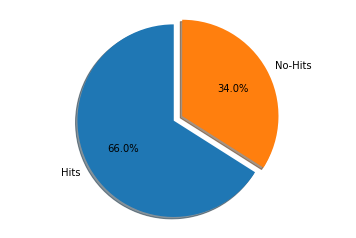

In [18]:
"""
The model is created, trained and tested for the dataset main_competitions_1819.csv. 
The dataset is devided in 90% for training and 10% for testing
"""

bets_csv_file = sc.textFile("../Data/Interim/main_competitions_1819.csv")

bet_houses = remove_duplicates(bets_csv_file.map(lambda line: line.split(","))\
        .map(lambda line : map(lambda bet_house : bet_house[:-1], line[8:20])).take(1)[0])

print("Bet Houses: " + str(bet_houses))

bets = bets_csv_file.map(lambda line: line.split(","))\
        .filter(lambda line : line[0] != "Country")\
        .map(lambda line: (result_to_numeric(line[7]), group(line[8:20])))\
        .filter(lambda element : len(element[1]) == (len(bet_houses)-2) * 3)

bets_list = bets.collect()
shuffle(bets_list)

training_set_length = int(len(bets_list)*0.9)

training_set = bets_list[:training_set_length]
testing_set = bets_list[training_set_length:]

bayes1RDD = sc.parallelize(training_set).map( lambda element :  LabeledPoint(element[0], Vectors.dense( element[1] ) ) )

print (bayes1RDD.take(5))

modelbayes1 = NaiveBayes.train(bayes1RDD)
print ( "\n Model parameters: \n", "  labels: ", modelbayes1.labels, \
"\n  prior probabilities (log of): ", modelbayes1.pi,   \
"\n  factor probabilities (log of): ", modelbayes1.theta, "\n")

# Make prediction and test accuracy on the training set.
predictionAndLabel = bayes1RDD.map(lambda p: (modelbayes1.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda pandl: pandl[0] == pandl[1]).count() / bayes1RDD.count()
print ( "Accuracy of the model obtained on training data : ", accuracy, "\n")


TryModel(testing_set)